In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn import preprocessing
from lazypredict.Supervised import LazyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import string

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelSpreading

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
df_lyrics = pd.read_csv("roy_lyrics_features.csv")
df_bb = pd.read_csv("roy_billboard_features.csv")
df_spotify = pd.read_csv("roy_spotify.csv")
df_spotify = df_spotify[df_spotify.time_signature != 111]

In [ ]:
print("Len of spotify data = ", len(df_spotify))
print("Len of billboard data = ", len(df_bb))
print("Len of lyrics data = ", len(df_lyrics))

Len of spotify data =  236
Len of billboard data =  240
Len of lyrics data =  239


In [ ]:
list1 = list(df_spotify["song"])
list2 = list(df_bb["song"])
list3 = list(df_lyrics["song"])

In [ ]:
df_spotify

,year,award category,song,artist,wasWinner,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1980,Record of the year,What A Fool Believes,The Doobie Brothers,yes,0.76,0.38,8,-15.31,0,...,0.28,0.00,0.05,0.98,120.74,223867,4,NaN,NaN,NaN
1,1980,Record of the year,You Don't Bring Me Flowers,Barbra Streisand And Neil Diamond,no,0.19,0.21,0,-13.02,1,...,0.89,0.00,0.16,0.21,86.98,204200,3,NaN,NaN,NaN
2,1980,Record of the year,The Gambler,Kenny Rogers,no,0.67,0.50,4,-13.12,1,...,0.34,0.00,0.19,0.86,87.04,214880,4,NaN,NaN,NaN
3,1980,Record of the year,I Will Survive,Gloria Gaynor,no,0.78,0.72,0,-8.68,1,...,0.01,0.01,0.25,0.53,116.67,198066,4,NaN,NaN,NaN
4,1980,Record of the year,After The Love Has Gone,Earth Wind & Fire,no,0.42,0.44,6,-13.45,1,...,0.53,0.00,0.67,0.39,131.68,278040,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2023,Record of the year,Woman,Doja Cat,no,0.82,0.76,5,-4.17,0,...,0.09,0.00,0.12,0.88,108.00,172627,4,NaN,NaN,NaN
232,2023,Record of the year,You And Me On The Rock,Brandi Carlile Featuring Lucius,no,0.57,0.69,1,-6.63,1,...,0.15,0.00,0.09,0.72,172.07,230098,4,NaN,NaN,NaN
233,2023,Record of the year,Good Morning Gorgeous,Mary J. Blige,no,0.52,0.58,1,-6.78,1,...,0.21,0.00,0.07,0.32,131.52,174728,3,NaN,NaN,NaN
234,2023,Record of the year,Easy On Me,Adele,no,0.60,0.37,5,-7.52,1,...,0.58,0.00,0.13,0.13,141.98,224695,4,NaN,NaN,NaN


In [ ]:
df_bb

,Unnamed: 0,year,award category,song,artist,wasWinner,weeks_in_top_25,weeks_in_top_10,weeks_on_chart,peak_position,average_position
0,0,1980,Record of the year,What A Fool Believes,The Doobie Brothers,yes,12,9,20,1,28.25
1,1,1980,Record of the year,You Don't Bring Me Flowers,Barbra Streisand And Neil Diamond,no,12,10,17,1,17.53
2,2,1980,Record of the year,The Gambler,Kenny Rogers,no,0,0,0,150,150.00
3,3,1980,Record of the year,I Will Survive,Gloria Gaynor,no,0,0,0,150,150.00
4,4,1980,Record of the year,After The Love Has Gone,Earth Wind & Fire,no,9,7,13,2,22.15
...,...,...,...,...,...,...,...,...,...,...,...
235,235,2023,Record of the year,Woman,Doja Cat,no,17,6,44,7,41.52
236,236,2023,Record of the year,You And Me On The Rock,Brandi Carlile Featuring Lucius,no,0,0,0,150,150.00
237,237,2023,Record of the year,Good Morning Gorgeous,Mary J. Blige,no,0,0,3,83,89.33
238,238,2023,Record of the year,Easy On Me,Adele,no,28,23,31,1,9.61


In [ ]:
df_lyrics

,Unnamed: 0,index,year,award category,song,artist,wasWinner,lyrics,num_words,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity
0,106,107,1980,Record of the year,What A Fool Believes,The Doobie Brothers,yes,he came from somewhere back in her long ago th...,279,0.39,0.21,0.07,0.17,0.24,0.24,0.26,0.10,0.30
1,107,108,1980,Record of the year,You Don't Bring Me Flowers,Barbra Streisand And Neil Diamond,no,you dont bring me flowers you dont sing me lov...,224,0.39,0.13,0.09,0.22,0.04,0.04,0.43,0.26,0.04
2,108,109,1980,Record of the year,The Gambler (Single),Kenny Rogers,no,on a warm summers evenin on a train bound for ...,421,0.38,0.03,0.04,0.05,0.51,0.16,0.14,0.14,0.85
3,109,110,1980,Record of the year,I Will Survive (Single),Gloria Gaynor,no,at first i was afraid i was petrified kept thi...,650,0.24,0.15,0.17,0.27,0.26,0.08,0.23,0.15,0.34
4,110,111,1980,Record of the year,After The Love Has Gone,Earth; Wind & Fire,no,for awhile to love was all we could do we were...,367,0.26,0.23,0.12,0.58,0.04,0.04,0.27,0.07,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,341,342,2023,Record of the year,Woman,Doja Cat,no,you you love it how i move you you love it how...,446,0.24,0.27,0.00,0.17,0.05,0.00,0.27,0.51,0.28
235,342,343,2023,Record of the year,You And Me On The Rock,Brandi Carlile Featuring Lucius,no,they build wooden houses on frozen ponds in th...,408,0.36,0.04,0.07,0.15,0.33,0.06,0.30,0.15,0.06
236,343,344,2023,Record of the year,Good Morning Gorgeous,Mary J. Blige,no,ooh ooh ooh ohh ah ooh ooh its so hard just...,338,0.36,0.33,0.12,0.31,0.06,0.11,0.31,0.22,0.20
237,344,345,2023,Record of the year,Easy On Me,Adele,no,there aint no gold in this river that ive been...,218,0.44,0.20,0.05,0.00,0.50,0.06,0.31,0.12,0.06


In [ ]:
list11 = list(df_spotify["artist"])
list22 = list(df_bb["artist"])
list33 = list(df_lyrics["artist"])

list11 = [s.lstrip() for s in list11]
list22 = [s.lstrip() for s in list22]
list33 = [s.lstrip() for s in list33]

list11 = [s.split()[0] for s in list11]
list22 = [s.split()[0] for s in list22]
list33 = [s.split()[0] for s in list33]

key1 = [list1[i] + list11[i] for i in range(len(list1))]
key2 = [list2[i] + list22[i] for i in range(len(list2))]
key3 = [list3[i] + list33[i] for i in range(len(list3))]

key1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in key1]
key2 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in key2]
key3 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in key3]

In [ ]:
df_bb["song_key"] = key2
df_spotify["song_key"] = key1
df_lyrics["song_key"] = key3

In [ ]:
df_spotify = df_spotify.drop('Unnamed: 18', axis=1)
df_spotify = df_spotify.drop('Unnamed: 19', axis=1)
df_spotify = df_spotify.drop('Unnamed: 20', axis=1)

df_spotify.columns


Index(['year', 'award category', 'song', 'artist', 'wasWinner', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'song_key'],
      dtype='object')

In [ ]:
# Merge the dataframes on the common column 'song_key'
merged_df = pd.merge(df_bb, df_spotify, on='song_key', how='inner')
merged_df = pd.merge(merged_df, df_lyrics, on='song_key', how='inner')

# Only keep rows that have information from all 3 dataframes
result_df = merged_df.dropna()


In [ ]:
result_df = result_df[['year_x', 'song_x', 'artist_x',
       'wasWinner_x', 'weeks_in_top_25', 'weeks_in_top_10', 'weeks_on_chart',
       'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy',
       'pos_sen', 'neg_sen', 'happy', 'fear', 'anger', 'sad', 'surprise',
       'profanity']]

In [ ]:
# Remove duplicate rows based on all columns
result_df = result_df.reset_index(drop=True).drop_duplicates()

In [ ]:
print("Len of combined data = ", len(result_df))

Len of combined data =  158


In [ ]:
# Remove duplicate rows based on all columns
result_df = result_df.reset_index(drop=True).drop_duplicates(subset=['weeks_in_top_25', 'weeks_in_top_10', 'weeks_on_chart',
       'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy',
       'pos_sen', 'neg_sen', 'happy', 'fear', 'anger', 'sad', 'surprise',
       'profanity'])

In [ ]:
result_df

,year_x,song_x,artist_x,wasWinner_x,weeks_in_top_25,weeks_in_top_10,weeks_on_chart,peak_position,average_position,danceability,...,num_words,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity
0,1980,What A Fool Believes,The Doobie Brothers,yes,12,9,20,1,28.25,0.76,...,279,0.39,0.21,0.07,0.17,0.24,0.24,0.26,0.10,0.30
1,1980,You Don't Bring Me Flowers,Barbra Streisand And Neil Diamond,no,12,10,17,1,17.53,0.19,...,224,0.39,0.13,0.09,0.22,0.04,0.04,0.43,0.26,0.04
2,1980,After The Love Has Gone,Earth Wind & Fire,no,9,7,13,2,22.15,0.42,...,367,0.26,0.23,0.12,0.58,0.04,0.04,0.27,0.07,0.09
3,1982,Bette Davis Eyes,Kim Carnes,yes,17,14,26,1,24.85,0.68,...,244,0.34,0.09,0.07,0.00,0.12,0.04,0.42,0.42,0.03
4,1982,Just The Two Of Us,Grover Washington Jr. With Bill Withers,no,13,11,24,2,30.17,0.75,...,567,0.18,0.04,0.02,0.04,0.11,0.00,0.58,0.27,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2023,Woman,Doja Cat,no,17,6,44,7,41.52,0.82,...,446,0.24,0.27,0.00,0.17,0.05,0.00,0.27,0.51,0.28
154,2023,You And Me On The Rock,Brandi Carlile Featuring Lucius,no,0,0,0,150,150.00,0.57,...,408,0.36,0.04,0.07,0.15,0.33,0.06,0.30,0.15,0.06
155,2023,Good Morning Gorgeous,Mary J. Blige,no,0,0,3,83,89.33,0.52,...,338,0.36,0.33,0.12,0.31,0.06,0.11,0.31,0.22,0.20
156,2023,Easy On Me,Adele,no,28,23,31,1,9.61,0.60,...,218,0.44,0.20,0.05,0.00,0.50,0.06,0.31,0.12,0.06


In [ ]:
# Splitting into features and target

feature_list = ['weeks_in_top_25', 'weeks_in_top_10', 'weeks_on_chart',
       'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy',
       'pos_sen', 'neg_sen', 'happy', 'fear', 'anger', 'sad', 'surprise',
       'profanity']

result_df['class'] = result_df['wasWinner_x'].replace({'yes': 1, 'no': 0})

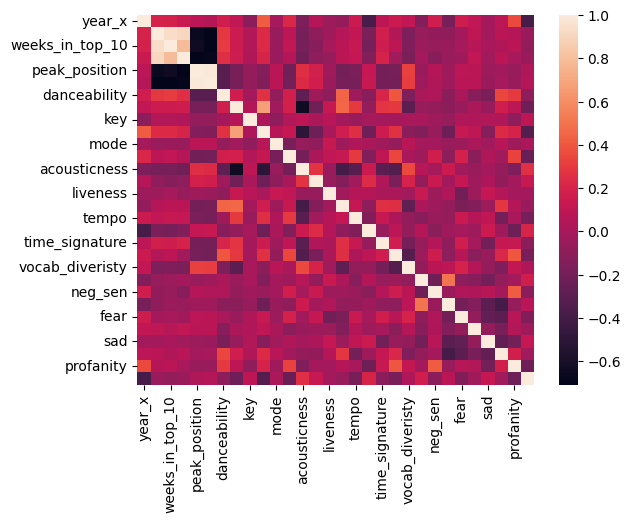

<Figure size 1500x1500 with 0 Axes>

In [ ]:
sns.heatmap(result_df.corr())
plt.figure(figsize=(15, 15))
plt.show()

In [ ]:
result_df.corr()

,year_x,weeks_in_top_25,weeks_in_top_10,weeks_on_chart,peak_position,average_position,danceability,energy,key,loudness,...,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity,class
year_x,1.00,0.20,0.19,0.14,0.09,0.05,0.17,0.10,-0.10,0.42,...,0.10,-0.13,0.17,-0.19,0.16,0.10,-0.01,0.08,0.35,-0.39
weeks_in_top_25,0.20,1.00,0.94,0.91,-0.66,-0.71,0.29,0.15,0.04,0.23,...,-0.16,-0.07,-0.08,-0.09,-0.01,0.10,-0.01,0.07,0.05,-0.05
weeks_in_top_10,0.19,0.94,1.00,0.79,-0.63,-0.70,0.30,0.15,0.05,0.23,...,-0.16,-0.04,-0.06,-0.05,-0.01,0.06,0.00,0.04,0.07,-0.08
weeks_on_chart,0.14,0.91,0.79,1.00,-0.70,-0.68,0.26,0.16,0.03,0.21,...,-0.17,-0.02,-0.13,-0.06,-0.04,0.10,-0.02,0.08,0.00,-0.05
peak_position,0.09,-0.66,-0.63,-0.70,1.00,0.98,-0.32,-0.19,-0.07,-0.13,...,0.31,-0.05,0.05,-0.03,0.08,0.08,-0.05,-0.01,-0.06,0.04
average_position,0.05,-0.71,-0.70,-0.68,0.98,1.00,-0.32,-0.19,-0.08,-0.15,...,0.31,-0.04,0.03,-0.03,0.08,0.08,-0.05,-0.01,-0.06,0.05
danceability,0.17,0.29,0.30,0.26,-0.32,-0.32,1.00,0.17,-0.01,0.27,...,-0.16,0.01,0.04,-0.11,0.00,-0.12,-0.17,0.35,0.30,-0.10
energy,0.10,0.15,0.15,0.16,-0.19,-0.19,0.17,1.00,0.05,0.67,...,-0.30,-0.05,-0.07,-0.11,-0.05,0.01,-0.05,0.17,0.09,-0.22
key,-0.10,0.04,0.05,0.03,-0.07,-0.08,-0.01,0.05,1.00,0.02,...,0.00,0.01,-0.03,-0.07,0.04,0.03,0.04,0.03,-0.09,0.09
loudness,0.42,0.23,0.23,0.21,-0.13,-0.15,0.27,0.67,0.02,1.00,...,-0.10,-0.15,-0.06,-0.22,0.13,0.09,-0.13,0.23,0.20,-0.33


In [ ]:
result_df['danceability'] = result_df['danceability'].astype('float64')
feature_variance = {}
for feature in feature_list:
    values = np.array(result_df[feature])
    x_norm = (values-np.min(values))/(np.max(values)-np.min(values))
    var = np.var(x_norm)
    #print("Variance for", feature, "=", var)
    feature_variance[feature] = var

In [ ]:
result_df.to_csv('roy_combined_without_search_trends.csv')

In [ ]:
sorted_variance = sorted(feature_variance.items(), key=lambda x:x[1])
features_sorted = []
for var in sorted_variance:
  print(var)
  features_sorted.append(var[0])

('time_signature', 0.006521891523794264)
('loudness', 0.011409017162936736)
('instrumentalness', 0.015253441437189553)
('anger', 0.022811206124985658)
('neg_sen', 0.02674758347042781)
('duration_ms', 0.027371667676800496)
('num_words', 0.03214195665269082)
('vocab_diveristy', 0.034360185363369294)
('pos_sen', 0.03517807933803607)
('sad', 0.035456027093215416)
('surprise', 0.035613566532239245)
('energy', 0.03939325473614404)
('happy', 0.04079814683837246)
('fear', 0.04158550576139955)
('liveness', 0.04259674043442137)
('speechiness', 0.04456928737941372)
('weeks_in_top_25', 0.04564426815197722)
('danceability', 0.04949877698442716)
('weeks_in_top_10', 0.05507251429713108)
('tempo', 0.06018555103504716)
('valence', 0.06379990466491299)
('acousticness', 0.06721088441572644)
('weeks_on_chart', 0.07103282482559863)
('key', 0.10470118292655471)
('average_position', 0.11108697659730457)
('profanity', 0.11184052779959398)
('peak_position', 0.13554120519016505)
('mode', 0.21394808524274947)


In [ ]:
def lazy_predict(result_df, feature_list, norm=False, print=False):
  X = result_df[feature_list]
  y = result_df["class"]

  if norm == True:
    scaler = StandardScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns)

  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

  clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
  models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  if print == True:
    print(models)
  return models

In [ ]:
for i in range(10):
  models = lazy_predict(result_df, features_sorted[i:], norm=True)
  print("Removing", i, "features", "F1 Score is", models.iloc[0][3])

100%|██████████| 29/29 [00:01<00:00, 25.11it/s]


Removing 0 features F1 Score is 0.75


100%|██████████| 29/29 [00:01<00:00, 27.97it/s]


Removing 1 features F1 Score is 0.75


100%|██████████| 29/29 [00:02<00:00, 10.31it/s]


Removing 2 features F1 Score is 0.75


100%|██████████| 29/29 [00:01<00:00, 28.55it/s]


Removing 3 features F1 Score is 0.75


100%|██████████| 29/29 [00:00<00:00, 29.02it/s]


Removing 4 features F1 Score is 0.75


100%|██████████| 29/29 [00:00<00:00, 29.07it/s]


Removing 5 features F1 Score is 0.75


100%|██████████| 29/29 [00:00<00:00, 29.19it/s]


Removing 6 features F1 Score is 0.787878787878788


100%|██████████| 29/29 [00:00<00:00, 29.21it/s]


Removing 7 features F1 Score is 0.7394957983193278


100%|██████████| 29/29 [00:00<00:00, 29.71it/s]


Removing 8 features F1 Score is 0.7394957983193278


100%|██████████| 29/29 [00:00<00:00, 29.09it/s]

Removing 9 features F1 Score is 0.75


Best performance when i = 6

In [ ]:
models = lazy_predict(result_df, features_sorted[6:], norm=True)

100%|██████████| 29/29 [00:01<00:00, 20.63it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.79,0.75,0.75,0.79,0.02
BernoulliNB,0.71,0.62,0.62,0.69,0.02
AdaBoostClassifier,0.62,0.56,0.56,0.62,0.17
LabelPropagation,0.71,0.56,0.56,0.62,0.02
XGBClassifier,0.67,0.56,0.56,0.63,0.05
QuadraticDiscriminantAnalysis,0.71,0.56,0.56,0.62,0.02
PassiveAggressiveClassifier,0.71,0.56,0.56,0.62,0.02
LabelSpreading,0.71,0.56,0.56,0.62,0.02
GaussianNB,0.67,0.56,0.56,0.63,0.02


In [ ]:
def evaluate_three_years(clf, result_df, feature_list, starting_year, norm=False):

  if norm == True:
    # Select only the numeric columns for scaling
    num_cols = result_df.select_dtypes(include=['float', 'int']).drop(columns=['year_x', 'class']).columns
    scaler = StandardScaler()
    scaler.fit(result_df[num_cols])
    result_df[num_cols] = scaler.transform(result_df[num_cols])

  df_train = result_df[(result_df['year_x'] >= starting_year) & (result_df['year_x'] <= 2020)]
  df_2021 = result_df[(result_df['year_x'] == 2021)]
  df_2022 = result_df[(result_df['year_x'] == 2022)]
  df_2023 = result_df[(result_df['year_x'] == 2023)]

  X_train = df_train[feature_list]
  y_train = df_train["class"]

  X_train = StandardScaler().fit_transform(X_train)

  X_2021 = df_2021[feature_list]
  X_2021 = StandardScaler().fit_transform(X_2021)
  y_2021 = df_2021["class"]

  X_2022 = df_2022[feature_list]
  X_2022 = StandardScaler().fit_transform(X_2022)
  y_2022 = df_2022["class"]

  X_2023 = df_2023[feature_list]
  X_2023 = StandardScaler().fit_transform(X_2023)
  y_2023 = df_2023["class"]

  clf.fit(X_train, y_train)

  overall_preds = []
  actuals = []


  print("2021 PREDICTIONS")

  proba = clf.predict_proba(X_2021)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2021.iloc[ind]["song_x"])
      overall_preds.append(df_2021.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2021.loc[df_2021['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2022 PREDICTIONS")

  proba = clf.predict_proba(X_2022)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2022.iloc[ind]["song_x"])
      overall_preds.append(df_2022.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2022.loc[df_2022['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2023 PREDICTIONS")

  proba = clf.predict_proba(X_2023)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2023.iloc[ind]["song_x"])
      overall_preds.append(df_2023.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2023.loc[df_2023['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])


  correct = 0
  for song in actuals:
    if song in overall_preds:
      correct += 1

  print("")
  print("Got", correct, "correct")
  print("")

In [ ]:
clf = RandomForestClassifier()

In [ ]:
evaluate_three_years(clf, result_df, features_sorted[0:], 1980, norm=True)

2021 PREDICTIONS
Top 3 predictions:
Colors
Everything I Wanted
Don't Start Now

Actual winner: 
Everything I Wanted

------------------------
2022 PREDICTIONS
Top 3 predictions:
I Get A Kick Out Of You
Happier Than Ever
I Still Have Faith In You

Actual winner: 
Leave The Door Open

------------------------
2023 PREDICTIONS
Top 3 predictions:
You And Me On The Rock
Easy On Me
Bad Habit

Actual winner: 
About Damn Time

Got 1 correct



Adding Search Trends Data

In [ ]:
df_trends = pd.read_csv("roy_search_trends.csv").drop(columns=["Unnamed: 0"])

In [ ]:
list1 = list(result_df["song_x"])
list2 = list(df_trends["song"])

In [ ]:
key1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list1]
key2 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list2]

In [ ]:
df_trends["song_key"] = key2
result_df["song_key"] = key1

In [ ]:
# Merge the dataframes on the common column 'song_key'
combined_df = pd.merge(df_trends, result_df, on='song_key', how='inner')

In [ ]:
len(combined_df)

114

In [ ]:
features_list = ['peak pop', 'avg pop', 'song_key', 'weeks_in_top_25', 'weeks_in_top_10',
       'weeks_on_chart', 'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy', 'pos_sen', 'neg_sen',
       'happy', 'fear', 'anger', 'sad', 'surprise', 'profanity', 'class']

In [ ]:
feature_variance = {}
for feature in feature_list:
    values = np.array(result_df[feature])
    x_norm = (values-np.min(values))/(np.max(values)-np.min(values))
    var = np.var(x_norm)
    #print("Variance for", feature, "=", var)
    feature_variance[feature] = var

In [ ]:
sorted_variance = sorted(feature_variance.items(), key=lambda x:x[1])
features_sorted = []
for var in sorted_variance:
  print(var)
  features_sorted.append(var[0])

('time_signature', 0.006521891523794268)
('loudness', 0.011409017162936737)
('instrumentalness', 0.015253441437189557)
('anger', 0.022811206124985658)
('neg_sen', 0.02674758347042781)
('duration_ms', 0.027371667676800493)
('num_words', 0.03214195665269082)
('vocab_diveristy', 0.034360185363369294)
('pos_sen', 0.03517807933803607)
('sad', 0.03545602709321541)
('surprise', 0.035613566532239245)
('energy', 0.03939325473614404)
('happy', 0.04079814683837247)
('fear', 0.041585505761399556)
('liveness', 0.04259674043442137)
('speechiness', 0.04456928737941373)
('weeks_in_top_25', 0.04564426815197721)
('danceability', 0.04949877698442716)
('weeks_in_top_10', 0.05507251429713106)
('tempo', 0.06018555103504714)
('valence', 0.06379990466491299)
('acousticness', 0.06721088441572642)
('weeks_on_chart', 0.07103282482559864)
('key', 0.10470118292655475)
('average_position', 0.11108697659730457)
('profanity', 0.111840527799594)
('peak_position', 0.13554120519016505)
('mode', 0.21394808524274947)


In [ ]:
for i in range(10):
  models = lazy_predict(combined_df, features_sorted[i:], norm=True)
  print("Removing", i, "features", "F1 Score is", models.iloc[0][3])

100%|██████████| 29/29 [00:00<00:00, 31.91it/s]


Removing 0 features F1 Score is 0.6770662287903667


100%|██████████| 29/29 [00:00<00:00, 31.49it/s]


Removing 1 features F1 Score is 0.6770662287903667


100%|██████████| 29/29 [00:00<00:00, 31.76it/s]


Removing 2 features F1 Score is 0.6369047619047618


100%|██████████| 29/29 [00:00<00:00, 32.53it/s]


Removing 3 features F1 Score is 0.6770662287903667


100%|██████████| 29/29 [00:00<00:00, 33.65it/s]


Removing 4 features F1 Score is 0.6770662287903667


100%|██████████| 29/29 [00:00<00:00, 33.74it/s]


Removing 5 features F1 Score is 0.7185185185185186


100%|██████████| 29/29 [00:00<00:00, 32.90it/s]


Removing 6 features F1 Score is 0.6057347670250895


100%|██████████| 29/29 [00:02<00:00, 11.66it/s]


Removing 7 features F1 Score is 0.7185185185185186


100%|██████████| 29/29 [00:00<00:00, 34.53it/s]


Removing 8 features F1 Score is 0.6057347670250895


100%|██████████| 29/29 [00:00<00:00, 33.07it/s]

Removing 9 features F1 Score is 0.6057347670250895


In [ ]:
clf = AdaBoostClassifier()

In [ ]:
evaluate_three_years(clf, combined_df, features_sorted[3:], 2005, norm=True)

2021 PREDICTIONS
Top 3 predictions:
Everything I Wanted
Black Parade
Don't Start Now

Actual winner: 
Everything I Wanted

------------------------
2022 PREDICTIONS
Top 3 predictions:
Peaches
I Get A Kick Out Of You
drivers license

Actual winner: 
Leave The Door Open

------------------------
2023 PREDICTIONS
Top 3 predictions:
Bad Habit
Woman
Don't Shut Me Down

Actual winner: 
About Damn Time

Got 1 correct



Let's try some SMOTE

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [ ]:
def lazy_predict_smote(result_df, feature_list, norm=False, print=False):
  X = result_df[feature_list]
  y = result_df["class"]

  # transform the dataset
  over = SMOTE(sampling_strategy=0.3)
  steps = [('over', over)]
  pipeline = Pipeline(steps=steps)
  X, y = pipeline.fit_resample(X, y)

  if norm == True:
    scaler = StandardScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns)

  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

  clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
  models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  if print == True:
    print(models)
  return models

In [ ]:
for i in range(10):
  models = lazy_predict_smote(combined_df, features_sorted[i:], norm=True)
  print("Removing", i, "features", "F1 Score is", models.iloc[0][3])

100%|██████████| 29/29 [00:01<00:00, 24.43it/s]


Removing 0 features F1 Score is 0.9444579189910258


100%|██████████| 29/29 [00:01<00:00, 25.48it/s]


Removing 1 features F1 Score is 0.9444579189910258


100%|██████████| 29/29 [00:02<00:00, 13.36it/s]


Removing 2 features F1 Score is 0.9015037593984964


100%|██████████| 29/29 [00:04<00:00,  6.74it/s]


Removing 3 features F1 Score is 0.8030075187969924


100%|██████████| 29/29 [00:03<00:00,  8.68it/s]


Removing 4 features F1 Score is 0.8548644338118022


100%|██████████| 29/29 [00:02<00:00, 10.94it/s]


Removing 5 features F1 Score is 0.9444579189910258


100%|██████████| 29/29 [00:03<00:00,  7.66it/s]


Removing 6 features F1 Score is 1.0


100%|██████████| 29/29 [00:02<00:00, 10.40it/s]


Removing 7 features F1 Score is 0.9444579189910258


100%|██████████| 29/29 [00:03<00:00,  7.80it/s]


Removing 8 features F1 Score is 1.0


100%|██████████| 29/29 [00:03<00:00,  7.65it/s]

Removing 9 features F1 Score is 1.0


In [ ]:
models = lazy_predict_smote(combined_df, features_sorted[9:], norm=True)

100%|██████████| 29/29 [00:00<00:00, 29.34it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.95,0.88,0.88,0.94,0.01
LabelSpreading,0.79,0.78,0.78,0.80,0.02
LabelPropagation,0.79,0.78,0.78,0.80,0.02
XGBClassifier,0.89,0.75,0.75,0.88,0.05
DecisionTreeClassifier,0.79,0.68,0.68,0.79,0.01
ExtraTreeClassifier,0.79,0.68,0.68,0.79,0.01
KNeighborsClassifier,0.79,0.68,0.68,0.79,0.01
AdaBoostClassifier,0.84,0.62,0.62,0.80,0.11
ExtraTreesClassifier,0.84,0.62,0.62,0.80,0.15


In [ ]:
def evaluate_three_years_smote(clf, result_df, feature_list, starting_year, norm=False):

  if norm == True:
    # Select only the numeric columns for scaling
    num_cols = result_df.select_dtypes(include=['float', 'int']).drop(columns=['year_x', 'class']).columns
    scaler = StandardScaler()
    scaler.fit(result_df[num_cols])
    result_df[num_cols] = scaler.transform(result_df[num_cols])

  df_train = result_df[(result_df['year_x'] >= starting_year) & (result_df['year_x'] <= 2020)]
  df_2021 = result_df[(result_df['year_x'] == 2021)]
  df_2022 = result_df[(result_df['year_x'] == 2022)]
  df_2023 = result_df[(result_df['year_x'] == 2023)]

  X_train = df_train[feature_list]
  y_train = df_train["class"]

  # transform the dataset
  oversample = RandomOverSampler(sampling_strategy=0.25)
  X_train, y_train = oversample.fit_resample(X_train, y_train)

  X_train = StandardScaler().fit_transform(X_train)

  X_2021 = df_2021[feature_list]
  X_2021 = StandardScaler().fit_transform(X_2021)
  y_2021 = df_2021["class"]

  X_2022 = df_2022[feature_list]
  X_2022 = StandardScaler().fit_transform(X_2022)
  y_2022 = df_2022["class"]

  X_2023 = df_2023[feature_list]
  X_2023 = StandardScaler().fit_transform(X_2023)
  y_2023 = df_2023["class"]

  clf.fit(X_train, y_train)

  overall_preds = []
  actuals = []


  print("2021 PREDICTIONS")

  proba = clf.predict_proba(X_2021)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2021.iloc[ind]["song_x"])
      overall_preds.append(df_2021.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2021.loc[df_2021['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2022 PREDICTIONS")

  proba = clf.predict_proba(X_2022)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2022.iloc[ind]["song_x"])
      overall_preds.append(df_2022.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2022.loc[df_2022['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2023 PREDICTIONS")

  proba = clf.predict_proba(X_2023)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2023.iloc[ind]["song_x"])
      overall_preds.append(df_2023.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2023.loc[df_2023['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])


  correct = 0
  for song in actuals:
    if song in overall_preds:
      correct += 1

  print("")
  print("Got", correct, "correct")
  print("")

In [ ]:
clf = AdaBoostClassifier()

In [ ]:
evaluate_three_years_smote(clf, combined_df, features_sorted[9:], 2005, norm=True)

2021 PREDICTIONS
Top 3 predictions:
Don't Start Now
Everything I Wanted
Say So

Actual winner: 
Everything I Wanted

------------------------
2022 PREDICTIONS
Top 3 predictions:
Leave The Door Open
I Get A Kick Out Of You
I Still Have Faith In You

Actual winner: 
Leave The Door Open

------------------------
2023 PREDICTIONS
Top 3 predictions:
About Damn Time
Easy On Me
Don't Shut Me Down

Actual winner: 
About Damn Time

Got 3 correct



In [ ]:
for i in range(9,len(features_sorted)):
  print(features_sorted[i], clf.feature_importances_[i-9])

sad 0.1
surprise 0.08
energy 0.04
happy 0.02
fear 0.06
liveness 0.08
speechiness 0.18
weeks_in_top_25 0.02
danceability 0.0
weeks_in_top_10 0.02
tempo 0.08
valence 0.0
acousticness 0.08
weeks_on_chart 0.04
key 0.0
average_position 0.04
profanity 0.16
peak_position 0.0
mode 0.0


In [ ]:
combined_df.to_csv('roy_combined.csv')

Visualizing the results

In [ ]:
combined_df

,song,year,peak pop,avg pop,song_key,year_x,song_x,artist_x,wasWinner_x,weeks_in_top_25,...,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity,class
0,Here We Go Again,-1.81,-1.02,-0.76,here we go again,2005,Here We Go Again,Ray Charles & Norah Jones,yes,-1.33,...,2.49,0.55,-0.15,0.45,0.16,-0.46,-0.30,0.03,-0.33,1
1,Yeah!,-1.81,-0.01,-0.01,yeah,2005,Yeah!,Usher Featuring Lil Jon & Ludacris,no,1.31,...,-0.40,1.86,-0.04,1.20,2.43,-0.98,-1.80,-0.86,1.51,0
2,Heaven,-1.81,1.55,3.67,heaven,2005,Heaven,Los Lonely Boys,no,-0.09,...,1.66,-0.55,-1.07,-0.81,0.09,0.59,-0.84,1.12,-1.20,0
3,American Idiot,-1.81,-0.24,-0.62,american idiot,2005,American Idiot,Green Day,no,-1.33,...,1.00,-0.15,1.24,2.16,0.09,0.59,-0.71,-1.57,1.00,0
4,Lets Get It Started,-1.81,-0.97,-0.73,lets get it started,2005,Let's Get It Started,The Black Eyed Peas,no,-1.00,...,-0.94,-0.79,-0.63,-0.88,-0.82,-0.72,1.20,0.60,-0.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Woman,1.35,1.55,3.24,woman,2023,Woman,Doja Cat,no,0.07,...,-1.28,1.31,-1.43,0.16,-1.42,-0.98,-0.16,1.69,-0.66,0
110,You And Me On The Rock,1.35,-1.03,-0.76,you and me on the rock,2023,You And Me On The Rock,Brandi Carlile Featuring Lucius,no,-1.33,...,0.34,-1.39,-0.52,0.01,0.69,-0.20,0.04,-0.61,-1.31,0
111,Good Morning Gorgeous,1.35,-1.03,-0.76,good morning gorgeous,2023,Good Morning Gorgeous,Mary J. Blige,no,-1.33,...,0.42,2.06,0.18,1.20,-1.35,0.46,0.11,-0.16,-0.89,0
112,Easy On Me,1.35,-0.61,-0.64,easy on me,2023,Easy On Me,Adele,no,0.98,...,1.51,0.52,-0.74,-1.10,1.98,-0.20,0.11,-0.80,-1.33,0


In [ ]:
combined_df.columns

Index(['song', 'year', 'peak pop', 'avg pop', 'song_key', 'year_x', 'song_x',
       'artist_x', 'wasWinner_x', 'weeks_in_top_25', 'weeks_in_top_10',
       'weeks_on_chart', 'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy', 'pos_sen', 'neg_sen',
       'happy', 'fear', 'anger', 'sad', 'surprise', 'profanity', 'class'],
      dtype='object')

In [ ]:
result_df.columns

Index(['year_x', 'song_x', 'artist_x', 'wasWinner_x', 'weeks_in_top_25',
       'weeks_in_top_10', 'weeks_on_chart', 'peak_position',
       'average_position', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'num_words',
       'vocab_diveristy', 'pos_sen', 'neg_sen', 'happy', 'fear', 'anger',
       'sad', 'surprise', 'profanity', 'class', 'song_key'],
      dtype='object')

In [ ]:
# X = combined_df[['peak pop', 'avg pop', 'weeks_in_top_25', 'weeks_in_top_10',
#        'weeks_on_chart', 'peak_position', 'average_position', 'danceability',
#        'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
#        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
#        'time_signature', 'num_words', 'vocab_diveristy', 'pos_sen', 'neg_sen',
#        'happy', 'fear', 'anger', 'sad', 'surprise', 'profanity']]

X = result_df[['weeks_in_top_25', 'weeks_in_top_10',
       'weeks_on_chart', 'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy', 'pos_sen', 'neg_sen',
       'happy', 'fear', 'anger', 'sad', 'surprise', 'profanity']]


y = result_df["class"]

In [ ]:
for column in X.columns:
    X[column] = (X[column] -
                           X[column].mean()) / X[column].std()  

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [ ]:
# Create a new dataframe with the principal components and the class labels
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['class'] = y

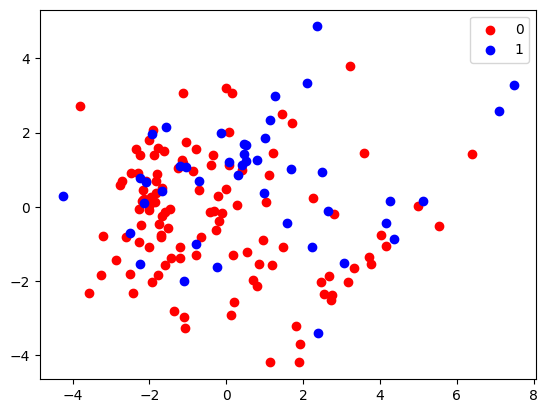

In [ ]:
# Plot the data with different colors for each class
colors = {0: 'red', 1: 'blue'}
fig, ax = plt.subplots()
groups = df_pca.groupby('class')
for name, group in groups:
    ax.scatter(group['PC1'], group['PC2'], c=colors[name], label=name)
ax.legend()
plt.show()

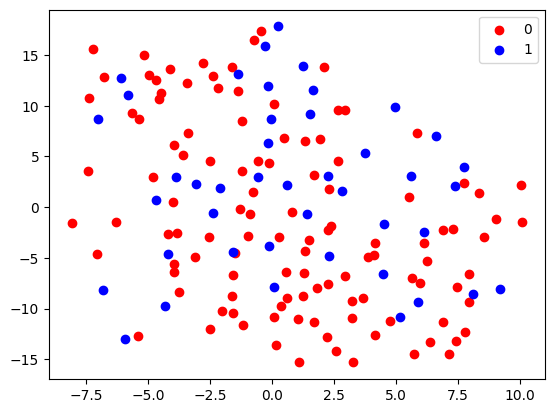

In [ ]:
# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_components = tsne.fit_transform(X)

# Create a new dataframe with the t-SNE components and the class labels
df_tsne = pd.DataFrame(data=tsne_components, columns=['t-SNE1', 't-SNE2'])
df_tsne['class'] = y

# Plot the data with different colors for each class
colors = {0: 'red', 1: 'blue'}
fig, ax = plt.subplots()
groups = df_tsne.groupby('class')
for name, group in groups:
    ax.scatter(group['t-SNE1'], group['t-SNE2'], c=colors[name], label=name)
ax.legend()
plt.show()

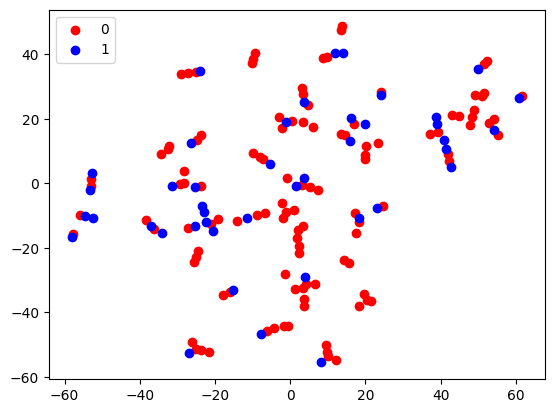

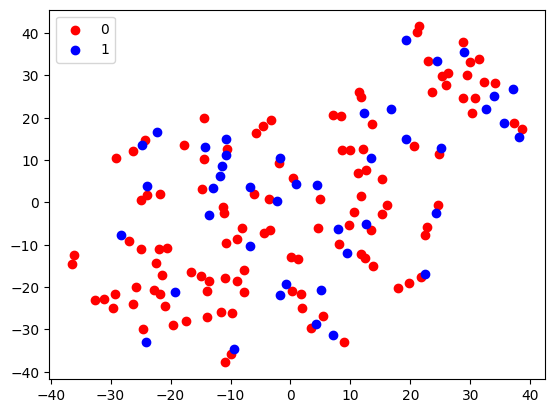

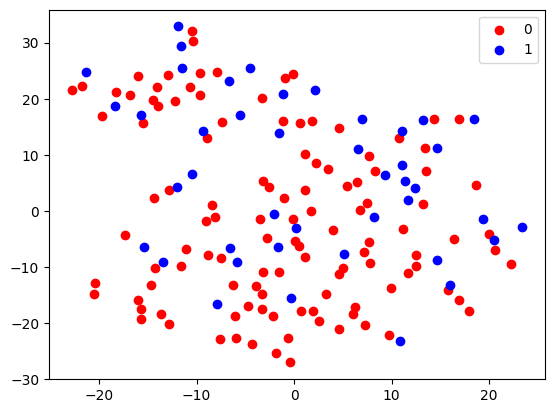

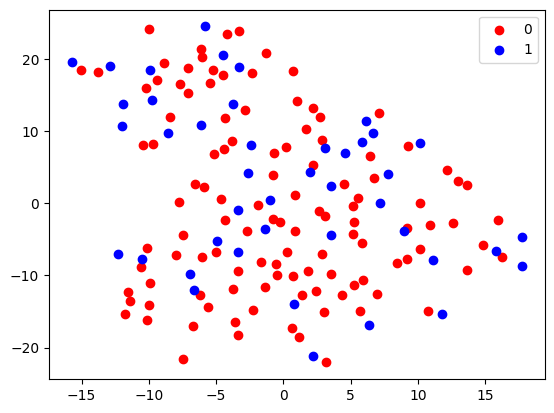

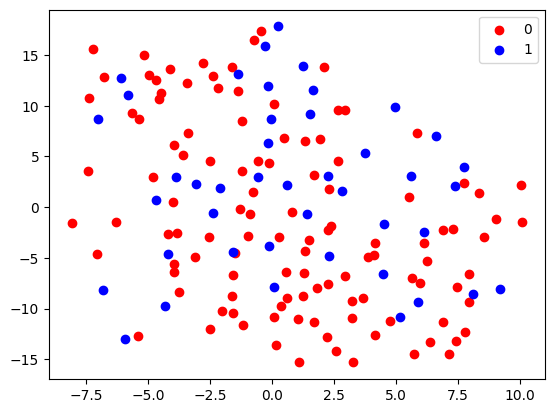

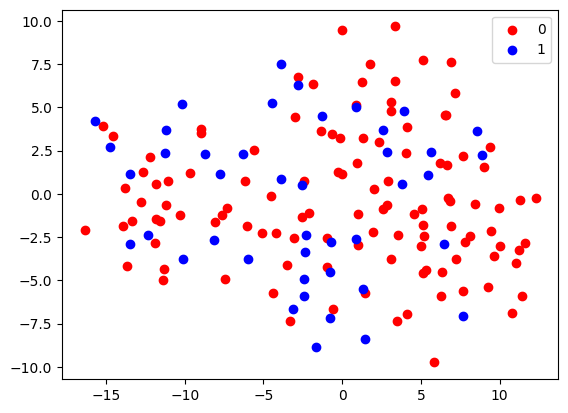

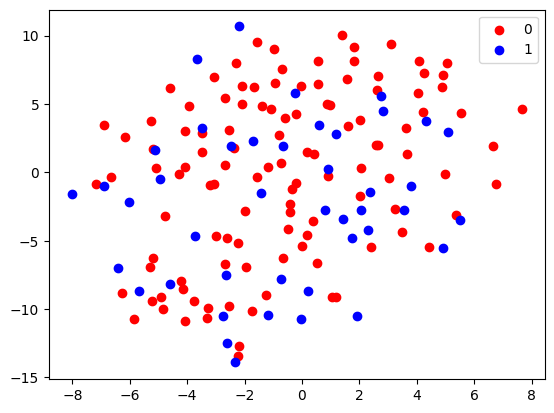

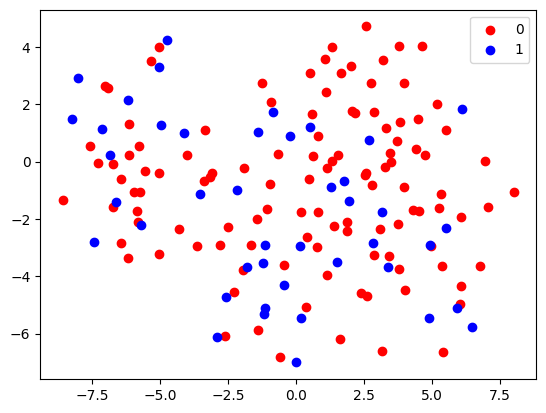

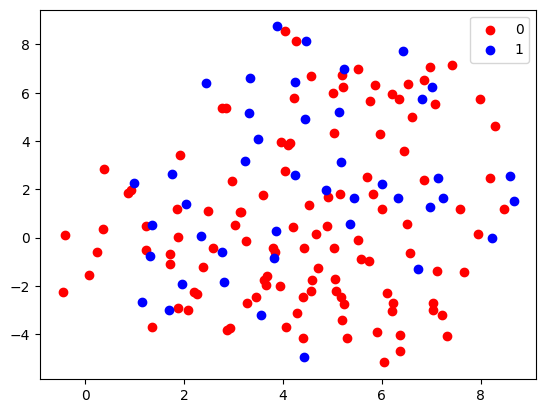

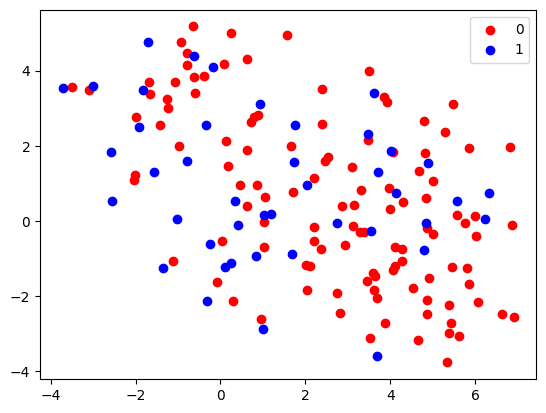

In [ ]:
perp_vals = [2, 5, 10, 15, 20, 22, 27, 34, 40, 45]

for perp in perp_vals:
  # Perform t-SNE
  tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
  tsne_components = tsne.fit_transform(X)

  # Create a new dataframe with the t-SNE components and the class labels
  df_tsne = pd.DataFrame(data=tsne_components, columns=['t-SNE1', 't-SNE2'])
  df_tsne['class'] = y

  # Plot the data with different colors for each class
  colors = {0: 'red', 1: 'blue'}
  fig, ax = plt.subplots()
  groups = df_tsne.groupby('class')
  for name, group in groups:
      ax.scatter(group['t-SNE1'], group['t-SNE2'], c=colors[name], label=name)
  ax.legend()
  plt.show()

In [ ]:
from sklearn.manifold import MDS
import seaborn as sns

Text(0.5, 1.0, 'MDS of Music dataset')

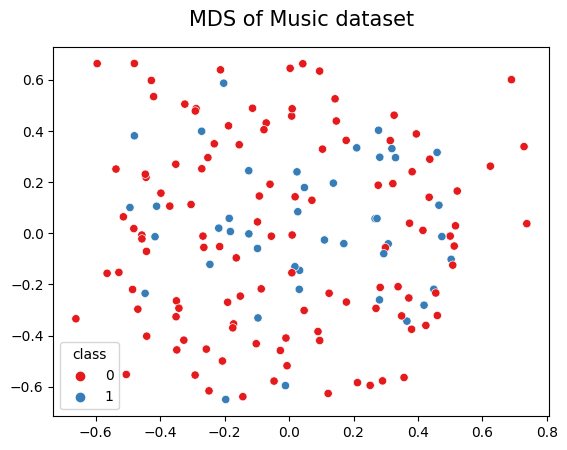

In [ ]:
mds = MDS(n_components=2, metric=False, random_state=2)
X_mds = mds.fit_transform(X)

sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1], hue=y, palette='Set1')
plt.title("MDS of Music dataset", fontsize=15, pad=15)

Looking at social media data now

In [ ]:
df_reddit = pd.read_csv("roy_reddit.csv")
df_youtube = pd.read_csv("roy_youtube.csv")

In [ ]:
list1 = df_reddit["song"]
list1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list1]
df_reddit["song_key"] = list1

In [ ]:
reddit_df = pd.merge(left=result_df, right=df_reddit, left_on='song_key', right_on='song_key', how='inner')

In [ ]:
reddit_df

,year_x,song_x,artist_x,wasWinner_x,weeks_in_top_25,weeks_in_top_10,weeks_on_chart,peak_position,average_position,danceability,...,surprise,profanity,class,song_key,song,artist,num_comments,avg_sentiment,perc_pos,perc_neg
0,2005,Heaven,Los Lonely Boys,no,0.08,-1.17,1.06,-0.28,0.05,0.06,...,1.11,-0.97,0,heaven,Heaven,Los Lonely Boys,4,-0.04,75.00,25.00
1,2006,Feel Good Inc.,Gorillaz Featuring De La Soul,no,-0.27,-1.17,-0.08,-0.31,-0.25,1.05,...,0.56,0.27,0,feel good inc,Feel Good Inc.,Gorillaz Featuring De La Soul,6,0.09,100.00,0.00
2,2007,Put Your Records On,Corinne Bailey Rae,no,-1.24,-1.17,-0.57,0.61,0.66,0.58,...,1.11,0.45,0,put your records on,Put Your Records On,Corinne Bailey Rae,7,0.31,100.00,0.00
3,2008,What Goes Around…Comes Around,Justin Timberlake,no,-1.24,-1.17,-1.42,2.16,2.11,0.26,...,2.09,-0.50,0,what goes around…comes around,What Goes Around…Comes Around,Justin Timberlake,1,0.20,100.00,0.00
4,2008,Irreplaceable,Beyoncé,no,0.70,0.72,0.70,-0.55,-0.59,-1.17,...,-1.45,0.59,0,irreplaceable,Irreplaceable,Beyoncé,2,0.00,100.00,0.00
5,2009,Please Read The Letter,Robert Plant & Alison Krauss,yes,-1.24,-1.17,-1.42,2.16,2.11,-0.75,...,0.99,-0.99,1,please read the letter,Please Read The Letter,Robert Plant _ Alison Krauss,2,0.47,50.00,50.00
6,2009,Bleeding Love,Leona Lewis,no,1.05,1.19,0.84,-0.55,-0.63,-0.03,...,-0.53,0.01,0,bleeding love,Bleeding Love,Leona Lewis,1,0.12,100.00,0.00
7,2010,Use Somebody,Kings Of Leon,yes,0.17,-0.11,0.99,-0.50,-0.09,-2.19,...,-1.14,-1.01,1,use somebody,Use Somebody,Kings Of Leon,4,0.36,100.00,0.00
8,2010,I Gotta Feeling,The Black Eyed Peas,no,0.08,0.60,-0.36,-0.55,-0.89,0.62,...,-0.29,-0.86,0,i gotta feeling,I Gotta Feeling,The Black Eyed Peas,37,0.09,75.68,24.32
9,2011,Need You Now,Lady Antebellum,yes,2.55,0.72,2.26,-0.53,-0.56,-0.33,...,1.60,-0.81,1,need you now,Need You Now,Lady Antebellum,6,0.20,100.00,0.00


In [ ]:
reddit_df.columns

Index(['year_x', 'song_x', 'artist_x', 'wasWinner_x', 'weeks_in_top_25',
       'weeks_in_top_10', 'weeks_on_chart', 'peak_position',
       'average_position', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'num_words',
       'vocab_diveristy', 'pos_sen', 'neg_sen', 'happy', 'fear', 'anger',
       'sad', 'surprise', 'profanity', 'class', 'song_key', 'song', 'artist',
       'num_comments', 'avg_sentiment', 'perc_pos', 'perc_neg'],
      dtype='object')

In [ ]:
(reddit_df.corr().unstack().sort_values().drop_duplicates())[0:15]

perc_pos          perc_neg           -1.00
weeks_in_top_25   average_position   -0.74
weeks_on_chart    peak_position      -0.73
acousticness      energy             -0.73
average_position  weeks_in_top_10    -0.72
weeks_on_chart    average_position   -0.72
weeks_in_top_25   peak_position      -0.70
peak_position     weeks_in_top_10    -0.66
loudness          instrumentalness   -0.60
                  acousticness       -0.58
num_words         vocab_diveristy    -0.53
energy            vocab_diveristy    -0.52
perc_neg          avg_sentiment      -0.49
energy            instrumentalness   -0.45
num_words         acousticness       -0.39
dtype: float64

In [ ]:
(reddit_df.corr().unstack().sort_values().drop_duplicates())[-15:]

vocab_diveristy  average_position   0.41
num_words        speechiness        0.43
                 energy             0.45
energy           valence            0.48
valence          danceability       0.49
perc_pos         avg_sentiment      0.49
acousticness     instrumentalness   0.52
vocab_diveristy  acousticness       0.55
profanity        neg_sen            0.60
energy           loudness           0.64
weeks_in_top_10  weeks_on_chart     0.77
weeks_in_top_25  weeks_in_top_10    0.92
                 weeks_on_chart     0.92
peak_position    average_position   0.98
year_x           year_x             1.00
dtype: float64

Same thing for youtube now

In [ ]:
list1 = df_youtube["song"]
list1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list1]
df_youtube["song_key"] = list1

In [ ]:
youtube_df = pd.merge(left=result_df, right=df_youtube, left_on='song_key', right_on='song_key', how='inner')

In [ ]:
(youtube_df.corr().unstack().sort_values().drop_duplicates())[0:15]

perc_pos          perc_neg           -1.00
weeks_in_top_25   average_position   -0.75
average_position  weeks_in_top_10    -0.74
peak_position     weeks_on_chart     -0.72
weeks_in_top_25   peak_position      -0.71
weeks_on_chart    average_position   -0.70
peak_position     weeks_in_top_10    -0.67
energy            acousticness       -0.64
year_x            perc_neg           -0.55
instrumentalness  loudness           -0.54
perc_neg          avg_sentiment      -0.52
avg_sentiment     speechiness        -0.46
loudness          acousticness       -0.42
peak_position     danceability       -0.42
vocab_diveristy   energy             -0.42
dtype: float64

In [ ]:
(youtube_df.corr().unstack().sort_values().drop_duplicates())[-15:]

neg_sen           profanity          0.40
time_signature    danceability       0.44
instrumentalness  acousticness       0.45
perc_pos          avg_sentiment      0.52
vocab_diveristy   acousticness       0.53
valence           energy             0.54
year_x            perc_pos           0.55
average_position  avg_sentiment      0.61
loudness          energy             0.62
peak_position     avg_sentiment      0.62
weeks_in_top_10   weeks_on_chart     0.78
weeks_in_top_25   weeks_on_chart     0.90
weeks_in_top_10   weeks_in_top_25    0.94
peak_position     average_position   0.98
year_x            year_x             1.00
dtype: float64